In [39]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import datetime
import numpy
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance

In [2]:
# Import our input dataset
football_df = pd.read_csv('TestData2021.csv')
football_df.head()

,id,season,week,season_type,start_date,start_time_tbd,completed,neutral_site,conference_game,attendance,...,away_line_scores[0],away_line_scores[1],away_line_scores[2],away_line_scores[3],away_post_win_prob,away_pregame_elo,away_postgame_elo,excitement_index,highlights,notes
0,401282714,2021,1,regular,2021-08-28T17:20:00.000Z,False,True,False,True,41064.0,...,0.0,9.0,7.0,6.0,0.594339,1503.0,1484.0,5.485981,NaN,NaN
1,401286187,2021,1,regular,2021-08-28T18:00:00.000Z,False,True,False,False,26043.0,...,0.0,0.0,0.0,0.0,0.001032,1223.0,1122.0,1.535556,NaN,NaN
2,401329133,2021,1,regular,2021-08-28T19:00:00.000Z,False,True,True,True,NaN,...,6.0,7.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
3,401309833,2021,1,regular,2021-08-28T19:30:00.000Z,False,True,False,False,32982.0,...,3.0,0.0,7.0,0.0,0.001076,1466.0,1378.0,1.391185,NaN,NaN
4,401328337,2021,1,regular,2021-08-28T22:00:00.000Z,False,True,False,False,NaN,...,0.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Dropping redundant or nonvalue features
football_df = football_df.drop(["id","start_time_tbd","completed","venue_id","venue","home_id","home_post_win_prob",
                                "home_pregame_elo","home_postgame_elo","away_id","away_post_win_prob","away_pregame_elo",
                                "away_postgame_elo","excitement_index","highlights","notes",
                                "home_line_scores[0]","home_line_scores[1]","home_line_scores[2]","home_line_scores[3]",
                                "away_line_scores[0]","away_line_scores[1]","away_line_scores[2]","away_line_scores[3]",
                                "attendance"],axis=1)
football_df.head()

,season,week,season_type,start_date,neutral_site,conference_game,home_team,home_conference,home_division,home_points,away_team,away_conference,away_division,away_points
0,2021,1,regular,2021-08-28T17:20:00.000Z,False,True,Illinois,Big Ten,fbs,30,Nebraska,Big Ten,fbs,22
1,2021,1,regular,2021-08-28T18:00:00.000Z,False,False,Fresno State,Mountain West,fbs,45,Connecticut,FBS Independents,fbs,0
2,2021,1,regular,2021-08-28T19:00:00.000Z,True,True,Central State,SIAC,ii,6,Kentucky State,SIAC,ii,20
3,2021,1,regular,2021-08-28T19:30:00.000Z,False,False,UCLA,Pac-12,fbs,44,Hawai'i,Mountain West,fbs,10
4,2021,1,regular,2021-08-28T22:00:00.000Z,False,False,Indiana State,MVFC,fcs,26,Eastern Illinois,OVC,fcs,21


In [4]:
#Converting date field to date and time
football_df["start_date"] = pd.to_datetime(football_df['start_date'])
football_df.head()

,season,week,season_type,start_date,neutral_site,conference_game,home_team,home_conference,home_division,home_points,away_team,away_conference,away_division,away_points
0,2021,1,regular,2021-08-28 17:20:00+00:00,False,True,Illinois,Big Ten,fbs,30,Nebraska,Big Ten,fbs,22
1,2021,1,regular,2021-08-28 18:00:00+00:00,False,False,Fresno State,Mountain West,fbs,45,Connecticut,FBS Independents,fbs,0
2,2021,1,regular,2021-08-28 19:00:00+00:00,True,True,Central State,SIAC,ii,6,Kentucky State,SIAC,ii,20
3,2021,1,regular,2021-08-28 19:30:00+00:00,False,False,UCLA,Pac-12,fbs,44,Hawai'i,Mountain West,fbs,10
4,2021,1,regular,2021-08-28 22:00:00+00:00,False,False,Indiana State,MVFC,fcs,26,Eastern Illinois,OVC,fcs,21


In [5]:
#Split date and time to individual fields
football_df["ScheduledDay_year"] = football_df["start_date"].dt.year
football_df["ScheduledDay_month"] = football_df["start_date"].dt.month
football_df["ScheduledDay_week"] = football_df["start_date"].dt.isocalendar().week
football_df["ScheduledDay_day"] = football_df["start_date"].dt.day
football_df["ScheduledDay_hour"] = football_df["start_date"].dt.hour
football_df["ScheduledDay_minute"] = football_df["start_date"].dt.minute
football_df["ScheduledDay_dayofweek"] = football_df["start_date"].dt.dayofweek
football_df = football_df.drop("start_date",axis=1)
football_df.head()

,season,week,season_type,neutral_site,conference_game,home_team,home_conference,home_division,home_points,away_team,away_conference,away_division,away_points,ScheduledDay_year,ScheduledDay_month,ScheduledDay_week,ScheduledDay_day,ScheduledDay_hour,ScheduledDay_minute,ScheduledDay_dayofweek
0,2021,1,regular,False,True,Illinois,Big Ten,fbs,30,Nebraska,Big Ten,fbs,22,2021,8,34,28,17,20,5
1,2021,1,regular,False,False,Fresno State,Mountain West,fbs,45,Connecticut,FBS Independents,fbs,0,2021,8,34,28,18,0,5
2,2021,1,regular,True,True,Central State,SIAC,ii,6,Kentucky State,SIAC,ii,20,2021,8,34,28,19,0,5
3,2021,1,regular,False,False,UCLA,Pac-12,fbs,44,Hawai'i,Mountain West,fbs,10,2021,8,34,28,19,30,5
4,2021,1,regular,False,False,Indiana State,MVFC,fcs,26,Eastern Illinois,OVC,fcs,21,2021,8,34,28,22,0,5


In [6]:
def home_win(game):
    if game['home_points'] > game['away_points']:
        return 1
    return 0

In [7]:
#Determine if the home team won
football_df["home_win"] = football_df.apply(lambda game: home_win(game), axis=1)
football_df.head()

,season,week,season_type,neutral_site,conference_game,home_team,home_conference,home_division,home_points,away_team,...,away_division,away_points,ScheduledDay_year,ScheduledDay_month,ScheduledDay_week,ScheduledDay_day,ScheduledDay_hour,ScheduledDay_minute,ScheduledDay_dayofweek,home_win
0,2021,1,regular,False,True,Illinois,Big Ten,fbs,30,Nebraska,...,fbs,22,2021,8,34,28,17,20,5,1
1,2021,1,regular,False,False,Fresno State,Mountain West,fbs,45,Connecticut,...,fbs,0,2021,8,34,28,18,0,5,1
2,2021,1,regular,True,True,Central State,SIAC,ii,6,Kentucky State,...,ii,20,2021,8,34,28,19,0,5,0
3,2021,1,regular,False,False,UCLA,Pac-12,fbs,44,Hawai'i,...,fbs,10,2021,8,34,28,19,30,5,1
4,2021,1,regular,False,False,Indiana State,MVFC,fcs,26,Eastern Illinois,...,fcs,21,2021,8,34,28,22,0,5,1


In [8]:
# Generate our categorical variable list
football_cat = football_df.dtypes[football_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
football_df[football_cat].nunique()

season_type          1
home_team          429
home_conference     43
home_division        4
away_team          444
away_conference     45
away_division        4
dtype: int64

In [9]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(football_df[football_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names_out(football_cat)
encode_df.head()

,season_type_regular,home_team_Abilene Christian,home_team_Adams State,home_team_Air Force,home_team_Akron,home_team_Alabama,home_team_Alabama A&M,home_team_Alabama State,home_team_Albany,home_team_Albany State (GA),...,away_conference_Southland,away_conference_Sun Belt,away_conference_USA South,away_conference_Wisconsin,away_conference_nan,away_division_fbs,away_division_fcs,away_division_ii,away_division_iii,away_division_nan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
# Merge one-hot encoded features and drop the originals
merged_df = football_df.merge(encode_df,left_index=True, right_index=True)
merged_df = merged_df.drop(football_cat,axis=1)
merged_df.head()

,season,week,neutral_site,conference_game,home_points,away_points,ScheduledDay_year,ScheduledDay_month,ScheduledDay_week,ScheduledDay_day,...,away_conference_Southland,away_conference_Sun Belt,away_conference_USA South,away_conference_Wisconsin,away_conference_nan,away_division_fbs,away_division_fcs,away_division_ii,away_division_iii,away_division_nan
0,2021,1,False,True,30,22,2021,8,34,28,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2021,1,False,False,45,0,2021,8,34,28,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2021,1,True,True,6,20,2021,8,34,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2021,1,False,False,44,10,2021,8,34,28,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2021,1,False,False,26,21,2021,8,34,28,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
#Convert boolean values to int
merged_df["neutral_site"]=merged_df["neutral_site"].astype(int)
merged_df["conference_game"]=merged_df["conference_game"].astype(int)
merged_df.head()

,season,week,neutral_site,conference_game,home_points,away_points,ScheduledDay_year,ScheduledDay_month,ScheduledDay_week,ScheduledDay_day,...,away_conference_Southland,away_conference_Sun Belt,away_conference_USA South,away_conference_Wisconsin,away_conference_nan,away_division_fbs,away_division_fcs,away_division_ii,away_division_iii,away_division_nan
0,2021,1,0,1,30,22,2021,8,34,28,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2021,1,0,0,45,0,2021,8,34,28,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2021,1,1,1,6,20,2021,8,34,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2021,1,0,0,44,10,2021,8,34,28,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2021,1,0,0,26,21,2021,8,34,28,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
counts = merged_df.isna().sum()
print(counts.sort_values())

season                                  0
away_team_Indiana State                 0
away_team_Indianapolis                  0
away_team_Iowa                          0
away_team_Iowa State                    0
                                       ..
home_team_Southeastern Louisiana        0
home_team_Southeastern Oklahoma         0
home_team_Southern                      0
home_team_Southern Connecticut State    0
away_division_nan                       0
Length: 988, dtype: int64


In [13]:
# Remove target from features data
y = merged_df.home_win
X = merged_df.drop(columns=["home_win","home_points","away_points"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.593


# Predicting over entire dataset

In [15]:
X_predict = scaler.fit(X)
X_predict_scaled = X_predict.transform(X)
prediction = rf_model.predict(X_predict_scaled)

In [16]:
predict_df = pd.DataFrame([football_df.home_team,
                           football_df.home_points,
                           football_df.away_team,
                           football_df.away_points,
                           football_df.home_win,
                           prediction]).transpose()
predict_df.rename(columns = {"Unnamed 0":"Prediction"}, inplace = True)
predict_df


,home_team,home_points,away_team,away_points,home_win,Prediction
0,Illinois,30,Nebraska,22,1,1
1,Fresno State,45,Connecticut,0,1,1
2,Central State,6,Kentucky State,20,0,0
3,UCLA,44,Hawai'i,10,1,1
4,Indiana State,26,Eastern Illinois,21,1,1
...,...,...,...,...,...,...
2403,North Dakota State,27,East Tennessee State,3,1,1
2404,Villanova,21,South Dakota State,35,0,0
2405,Army,13,Navy,17,0,0
2406,Ferris State,55,Shepherd,7,1,1


In [17]:
print(f" Random forest predictive accuracy: {accuracy_score(y,prediction):.3f}")

 Random forest predictive accuracy: 0.898


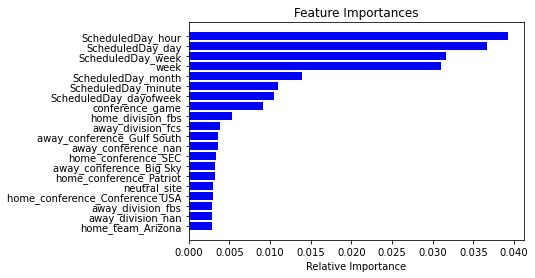

In [50]:
plt.title('Feature Importances')

top_features = 20
features = X.columns
importances = rf_model.feature_importances_
index = numpy.argsort(importances)

plt.barh(range(top_features), importances[index[-top_features:]], color='b', align='center')
plt.yticks(range(top_features), [features[i] for i in index[-top_features:]])
plt.xlabel('Relative Importance')
plt.show()